In [6]:
import numpy as np
import matplotlib.pyplot as plt
import NSsolver as ns
try:
    plt.style.use("jupyter")
except OSError:
    print("Delaut syle in use")

In [11]:
def update(x, X, u0, V, dx, dt=1, rho=1, Nsteps=1):
    
    u_n = u0
    
    for i in range(Nsteps):
        
        # first step
        u_1 = u_n + dt*ns.r(u_n)
        u_star = u_1 + dt*f(x, X, u_1, V, dx, dt, rho)

        sigma = ns.div(u_star, dx)

        p = ns.solve_pressure(np.ones_like(sigma), sigma, dx)

        u_n = u_star - dt/rho*(ns.grad(p, dx))
    
    return u_star, sigma, p, u_n

def kernel(d):
    return np.where(abs(d)<=.5, .75-d**2, np.where(abs(d)<=1.5,.5*(2.25-3*abs(d)+d**2), 0))

def Ic(x, X, dx, f):
    # interpolation operator
    return np.sum(f*kernel((X - x)/dx))

def Sc(x, X, F, ds=1):
    # spreading operator
    return kernel((X - x)/dx)*ds*F

def f(x, X, u, V, dx, dt, rho):
    # interpolate to Lagrangian point
#     Ur = Ic(x, X, dx, u)
    # compute Lagrangian force density
    F = rho*(max(x)-min(x))/dt #rho/dt*(V - Ur)
    return Sc(x, X, F) # extrapolate to Eulerian points

In [12]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x + 0.5*dx # scalar cell-centred values
X = np.random.rand()-0.5
V = 1
u0 = np.zeros_like(x)
dt = 1.

us, sigma, p, u_n = update(x, X, u0, V, dx, dt)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Interface at X: 0.39
L inf: 9.375e-01


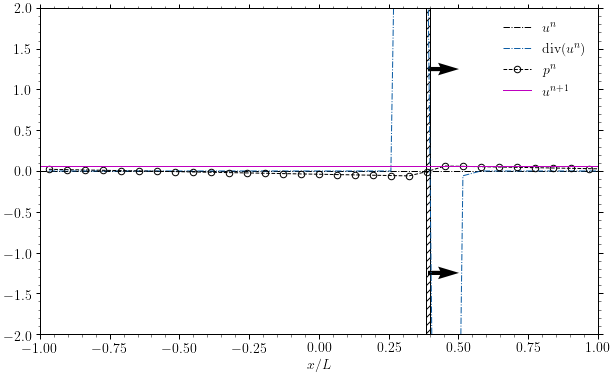

In [13]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)

In [14]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x + 0.5*dx # scalar cell-centred values
X = np.random.rand()-0.5
V = 1
u0 = np.zeros_like(x)
dt = 1.

us, sigma, p, u_n = update(x, X, u0, V, dx, dt, Nsteps=100)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Interface at X: 0.26
L inf: 5.250e+00


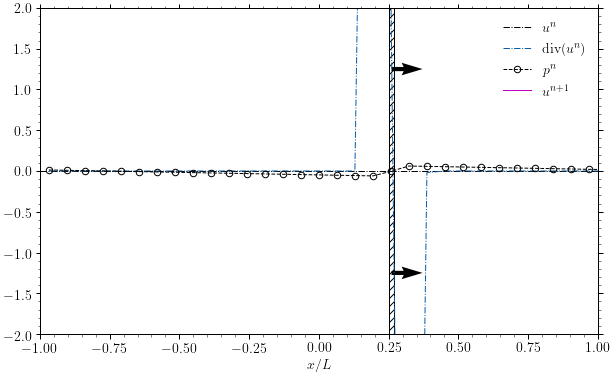

In [15]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)